In [ ]:
# Mandelbrot, Julia set, Newton Fractal, Douady Rabbit, Siegel disk, Sierpinski Carpet, ...

In [ ]:
# Fractal Constants
# c = 1j              # mandelbrot, dentrite fractal
# c = 1/3 + 1j/3      # quadratic julia set
# c = -0.123 + 0.745j # douady's rabbit fractal
# c = -0.750 + 0j     # san marco fractal
# c = -0.391 - 0.587j # siegel disk fractal
# c = -0.7 - 0.3j     # NEAT cauliflower thingy
# c = -0.75 - 0.2j    # galaxies
# c = -0.75 + 0.15j   # groovy
# c = -0.7 + 0.35j    # frost

In [1]:
import math
from itertools import product
import matplotlib.pyplot as plt
import numpy as np
import sys
from math import sqrt, pi
from cmath import sin, cos

In [ ]:
# 1. Mandelbrot ( Herman rings are a series of nodes arranged on both sides of a curve)

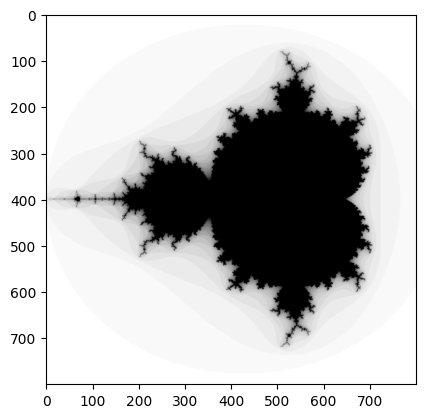

In [2]:
def mandelbrot( h,w, maxit=20 ):
     y,x = np.ogrid[ -1.4:1.4:h*1j, -2:0.8:w*1j ]
     c = x+y*1j
     z = c
     divtime = maxit + np.zeros(z.shape, dtype=int)

     for i in range(maxit):
         z = z**2 + c
         diverge = z*np.conj(z) > 2**2         # who is diverging
         div_now = diverge & (divtime==maxit)  # who is diverging now
         divtime[div_now] = i                  # note when
         z[diverge] = 2                        # avoid diverging too much

     return divtime
plt.imshow(mandelbrot(800,800), cmap='Greys')
plt.show()

In [ ]:
# 2. Julia set (Julia set and the Fatou set are two complementary sets. Julia ‘laces’ and Fatou ‘dusts’.)

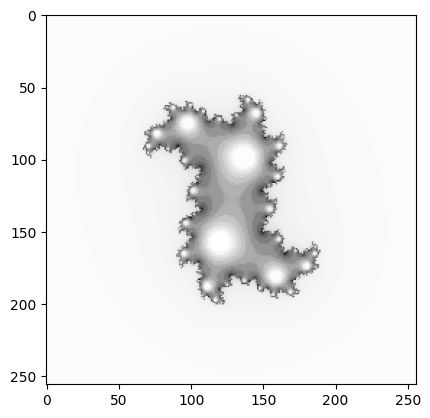

In [3]:
# Set the image size
SIZE = 256
image = np.zeros((SIZE, SIZE))

#This sets the maximum number of iterations of the function
max_iterations = 200

# Set the bounds of the complex plane to be plotted
x_min = -2.0
x_max = 2.0
y_min = -2.0
y_max = 2.0

# sets the boundaries of the complex plane that we're working on p(z)=z^2+1/3+i/3
c = 1/3 + 1j/3  # Fill in your value for c

#Find fixed points
coefficients = [1, -1, c]
xf = np.roots(coefficients)

# define the function p(z) = z^2 + c
def p(z):
    return z**2 + c

# Iterates over each pixel
for x in range(SIZE):
    for y in range(SIZE):

        # Maps pixels to complex plane
        re = x_min + x * (x_max - x_min)/SIZE
        im = y_min + y * (y_max - y_min)/SIZE

        # Define the initial value of z for each pixel
        z = re + 1j*im

        # Iterate the function p(z) until the escape condition is met
        for i in range(max_iterations):

            # Check if z is outside the circle of radius 10 centered at the origin
            if abs(z) > 10: # Fix this threshold test
                image[y, -x] = i # Fill in image addressing here
                break

            # Check if z is close to the attractive fixed point
            elif abs(z - xf[1]) < 0.1: # Fix this threshhold test
                image[y, -x] = i # Fill in image addressing here
                break

            z = p(z)

# Display the image
plt.figure()
plt.imshow(image, cmap='Greys')

In [ ]:
# 3. Polynomial Newton Fractal

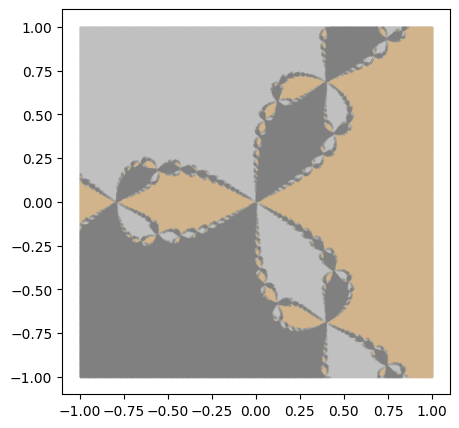

In [4]:
# Set the image size
plt.subplots(figsize=(5, 5))

COLORS = ['tan', 'silver', 'grey']
MAX_ITER = 100
CONVERGE_DIST = 0.05
N_SAMPLES = 850
PLOT_MARKER_SIZE = 0.01

roots = [complex(1, 0), complex(-0.5, math.sqrt(3) * 0.5), complex(-0.5, -math.sqrt(3) * 0.5)]
samples = np.linspace(-1, 1, N_SAMPLES)
points_by_root = {r: [] for r in roots}

def f(x):
    return x ** 3 - 1

def df(x):
    return 3 * x ** 2

def newtons_method(x):
    counter = 0
    abs_y = abs(f(x))
    while abs_y > CONVERGE_DIST:
        fx = f(x)
        x = x - fx / df(x)
        counter += 1
        if counter == MAX_ITER or abs_y > 10e+12:
            return None
        abs_y = abs(fx)
    return x

def add_point_to_root(x, y):
    root = newtons_method(complex(x, y))
    if root is None:
        return
    for r in roots:
        if abs(r - root) < CONVERGE_DIST:
            points_by_root[r].append((x, y))
            break

def plot():
    for (x,y) in product(samples, samples):
        add_point_to_root(x, y)

    for i, r in enumerate(roots):
        plt.scatter(*zip(*points_by_root[r]),
                    color=COLORS[i],
                    s=PLOT_MARKER_SIZE)
    plt.show()

plot()

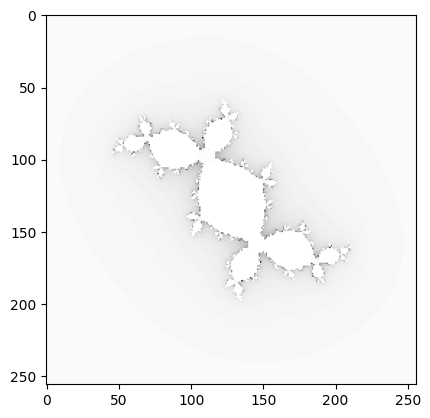

In [ ]:
# 4. Douady Rabbit

# Set the image size
SIZE = 256
image = np.zeros((SIZE, SIZE))

# Set the maximum number of iterations of the function
max_iterations = 200

# Set the bounds of the complex plane to be plotted
x_min = -2.0
x_max = 2.0
y_min = -2.0
y_max = 2.0

# Set the boundaries of the complex plane that we're working on p(z)=z^2+1/3+i/3
c = -0.123 + 0.745j # Fill in your value for c, this one stands for a rabbit

#Find fixed points
coefficients = [1, -1, c]
xf = np.roots(coefficients)

# Define the function p(z) = z^2 + c
def p(z):
    return z**2 + c

# Iterates over each pixel
for x in range(SIZE):
    for y in range(SIZE):

        # Maps pixels to complex plane
        re = x_min + x * (x_max - x_min)/SIZE
        im = y_min + y * (y_max - y_min)/SIZE

        # Define the initial value of z for each pixel
        z = re + 1j*im

        # Iterate the function p(z) until the escape condition is met
        for i in range(max_iterations):

            # Check if z is outside the circle of radius 10 centered at the origin
            if abs(z) > 10: # Fix this threshold test
                image[y, -x] = i # Fill in image addressing here
                break

            # Check if z is close to the attractive fixed point
            elif abs(z - xf[1]) < 0.1: # Fix this threshhold test
                image[y, -x] = i # Fill in image addressing here
                break

            z = p(z)

# Display the image
plt.figure()
plt.imshow(image, cmap='Greys')

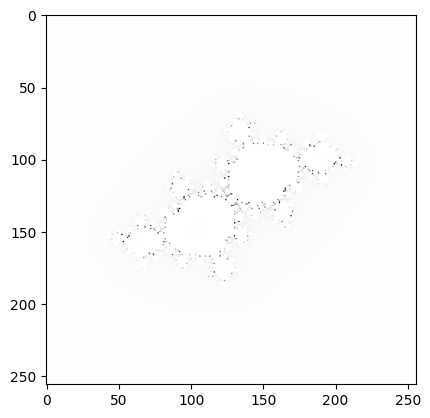

In [ ]:
# 5. Siegel Disc
# Set the image size
SIZE = 256
image = np.zeros((SIZE, SIZE))

# Set the maximum number of iterations of the function
max_iterations = 200

# set the complex plane of plot
x_min = -2.0
x_max = 2.0
y_min = -2.0
y_max = 2.0

# set value for constant c ( this one stands for a siegel disc )
c = -0.391 - 0.587j

# Find fixed points
coefficients = [1, -1, c]
xf = np.roots(coefficients)

# Define the function p(z) = z^2 + c
def p(z):
    return z**2 + c

# Iterates over each pixel
for x in range(SIZE):
    for y in range(SIZE):

        # Maps pixels to complex plane
        re = x_min + x * (x_max - x_min)/SIZE
        im = y_min + y * (y_max - y_min)/SIZE

        # Define the initial value of z for each pixel
        z = re + 1j*im

        # Iterate the function p(z) until the escape condition is met
        for i in range(max_iterations):

            # Check if z is outside the circle of radius 10 centered at the origin
            if abs(z) > 10: # Fix this threshold test
                image[y, -x] = i # Fill in image addressing here
                break

            # Check if z is close to the attractive fixed point
            elif abs(z - xf[1]) < 0.1: # Fix this threshhold test
                image[y, -x] = i # Fill in image addressing here
                break

            z = p(z)

# Display the image
plt.figure()
plt.imshow(image, cmap='Greys')

In [ ]:
# 6. Sierpinski Carpet

In [4]:
# importing necessary modules
from PIL import Image

# total number of times the process will be repeated
total = 7

# size of the image
size = 3**total

# creating an image
square = np.empty([size, size, 3], dtype = np.uint8)
color = np.array([255, 255, 255], dtype = np.uint8)

# filling it black
square.fill(0)

for i in range(0, total + 1):
    stepdown = 3**(total - i)
    for x in range(0, 3**i):

        # checking for the centremost square
        if x % 3 == 1:
            for y in range(0, 3**i):
                if y % 3 == 1:

                    # changing its color
                    square[y * stepdown:(y + 1)*stepdown, x * stepdown:(x + 1)*stepdown] = color

# saving the image produced
output= "sierpinski.jpg"
Image.fromarray(square).save(output)

# displaying it in console
Image.open('sierpinski.jpg').show()


In [ ]:
# 7. Mandelbrot animation

In [ ]:
import matplotlib.animation as animation

In [ ]:
def mandelbrot(x, y, threshold):
    # initial conditions
    c = complex(x, y)
    z = complex(0, 0)

    for i in range(threshold):
        z = z**2 + c
        if abs(z) > 4.:  # it diverged
            return i

    return threshold - 1  # it didn't diverge

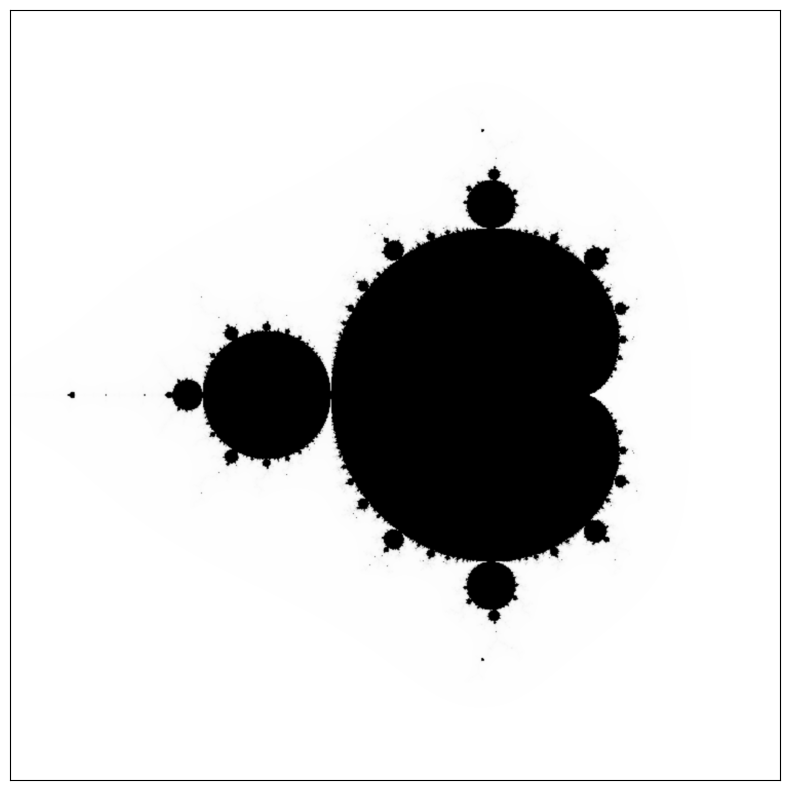

In [ ]:
x_start, y_start = -2, -1.5  # an interesting region starts here
width, height = 3, 3  # for 3 units up and right
density_per_unit = 250  # how many pixles per unit

# real and imaginary axis
re = np.linspace(x_start, x_start + width, width * density_per_unit )
im = np.linspace(y_start, y_start + height, height * density_per_unit)

fig = plt.figure(figsize=(10, 10))  # instantiate a figure to draw
ax = plt.axes()  # create an axes object

def animate(i):
    ax.clear()  # clear axes object
    ax.set_xticks([], [])  # clear x-axis ticks
    ax.set_yticks([], [])  # clear y-axis ticks

    X = np.empty((len(re), len(im)))  # re-initialize the array-like image
    threshold = round(1.15**(i + 1))  # calculate the current threshold

    # iterations for the current threshold
    for i in range(len(re)):
        for j in range(len(im)):
            X[i, j] = mandelbrot(re[i], im[j], threshold)

    # associate colors to the iterations with an iterpolation
    img = ax.imshow(X.T, interpolation="bicubic", cmap='Greys')
    return [img]

anim = animation.FuncAnimation(fig, animate, frames=45, interval=120, blit=True)
anim.save('mandelbrot.gif',writer='imagemagick')

In [ ]:
# 8. Julia set animation

In [ ]:
def julia_quadratic(zx, zy, cx, cy, threshold):
    # initial conditions
    z = complex(zx, zy)
    c = complex(cx, cy)

    for i in range(threshold):
        z = z**2 + c
        if abs(z) > 4.:  # it diverged
            return i

    return threshold - 1  # it didn't diverge

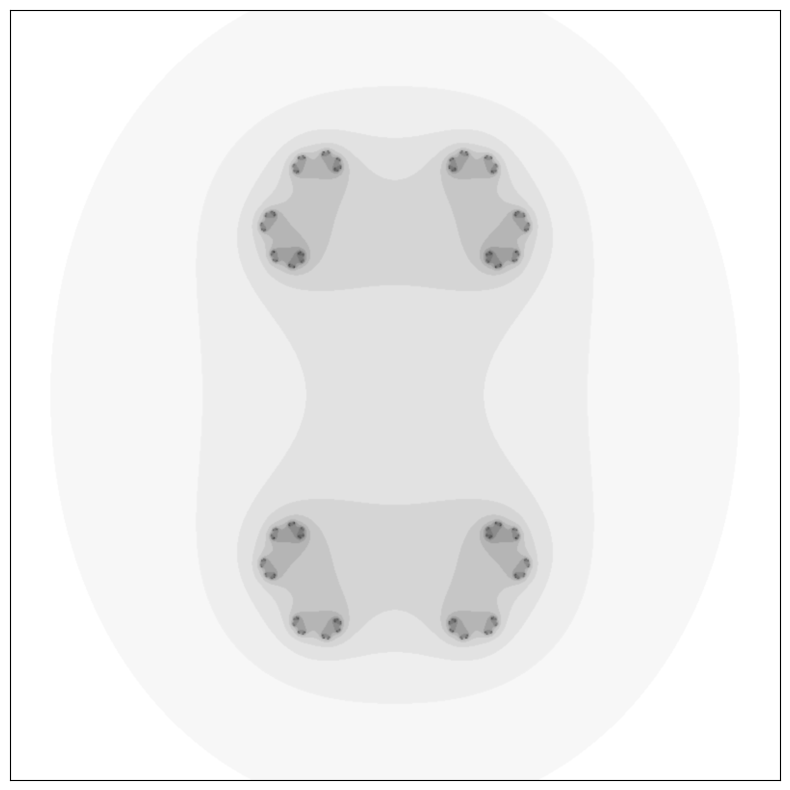

In [ ]:
x_start, y_start = -2, -2  # an interesting region starts here
width, height = 4, 4  # for 4 units up and right
density_per_unit = 200  # how many pixles per unit

# real and imaginary axis
re = np.linspace(x_start, x_start + width, width * density_per_unit )
im = np.linspace(y_start, y_start + height, height * density_per_unit)

threshold = 20  # max allowed iterations
frames = 100  # number of frames in the animation

# we represent c as c = r*cos(a) + i*r*sin(a) = r*e^{i*a}
r = 0.7885
a = np.linspace(0, 2*np.pi, frames)

fig = plt.figure(figsize=(10, 10))  # instantiate a figure to draw
ax = plt.axes()  # create an axes object

def animate(i):
    ax.clear()  # clear axes object
    ax.set_xticks([], [])  # clear x-axis ticks
    ax.set_yticks([], [])  # clear y-axis ticks

    X = np.empty((len(re), len(im)))  # the initial array-like image
    cx, cy = r * np.cos(a[i]), r * np.sin(a[i])  # the initial c number

    # iterations for the given threshold
    for i in range(len(re)):
        for j in range(len(im)):
            X[i, j] = julia_quadratic(re[i], im[j], cx, cy, threshold)

    img = ax.imshow(X.T, interpolation="bicubic", cmap='Greys')
    return [img]

anim = animation.FuncAnimation(fig, animate, frames=frames, interval=50, blit=True)
anim.save('julia_set.gif', writer='imagemagick')

In [ ]:
# https://matplotlib.org/matplotblog/posts/animated-fractals/
# https://en.wikipedia.org/wiki/Julia_set
# https://en.wikipedia.org/wiki/Douady_rabbit
# https://en.wikibooks.org/wiki/Fractals/Iterations_in_the_complex_plane/jlamination
# https://commons.wikimedia.org/wiki/User:Soul_windsurfer#tuned_rabbit
# https://computational-discovery-on-jupyter.github.io/Computational-Discovery-on-Jupyter/Contents/fractals-and-julia-sets.html
# https://en.wikipedia.org/wiki/Dragon_curve
# https://www.reddit.com/r/askmath/comments/14q2bdx/julia_set_generator_python_fractals/
# https://medium.com/@mikatal/fractals-ead61e5b3938
# https://paulbourke.net/fractals/juliaset/julia_set.py
# https://en.wikipedia.org/wiki/Siegel_disc
# https://en.wikipedia.org/wiki/Fractal
